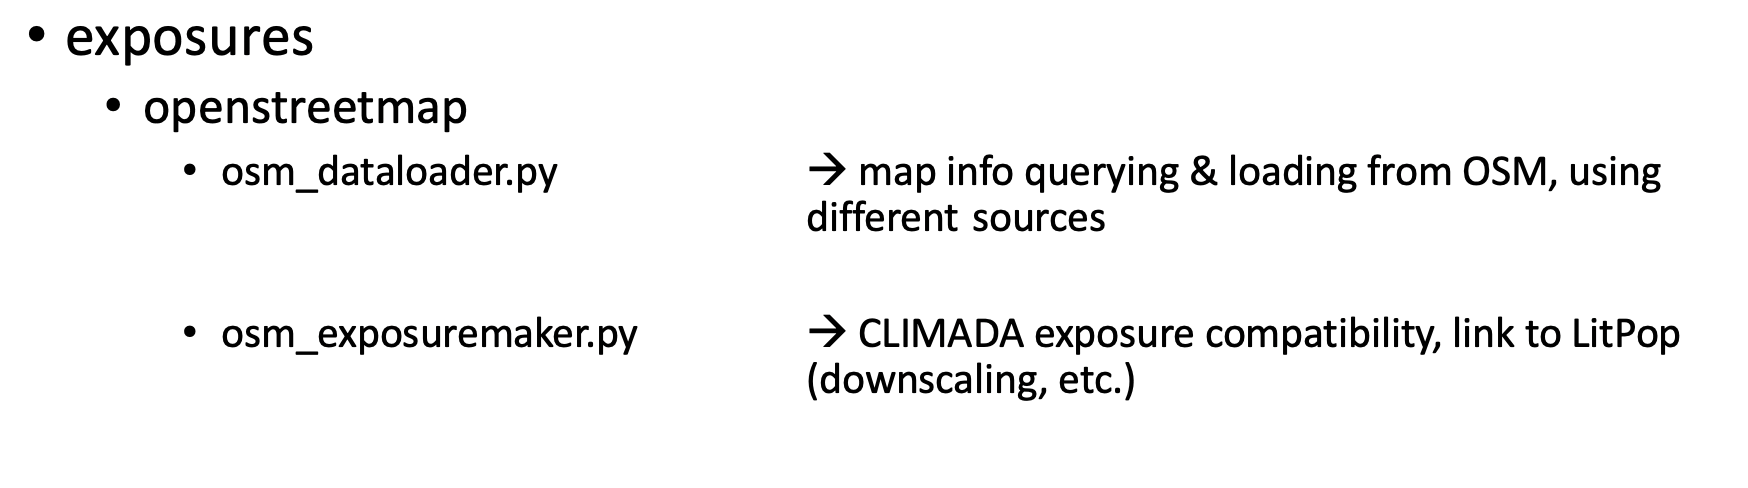

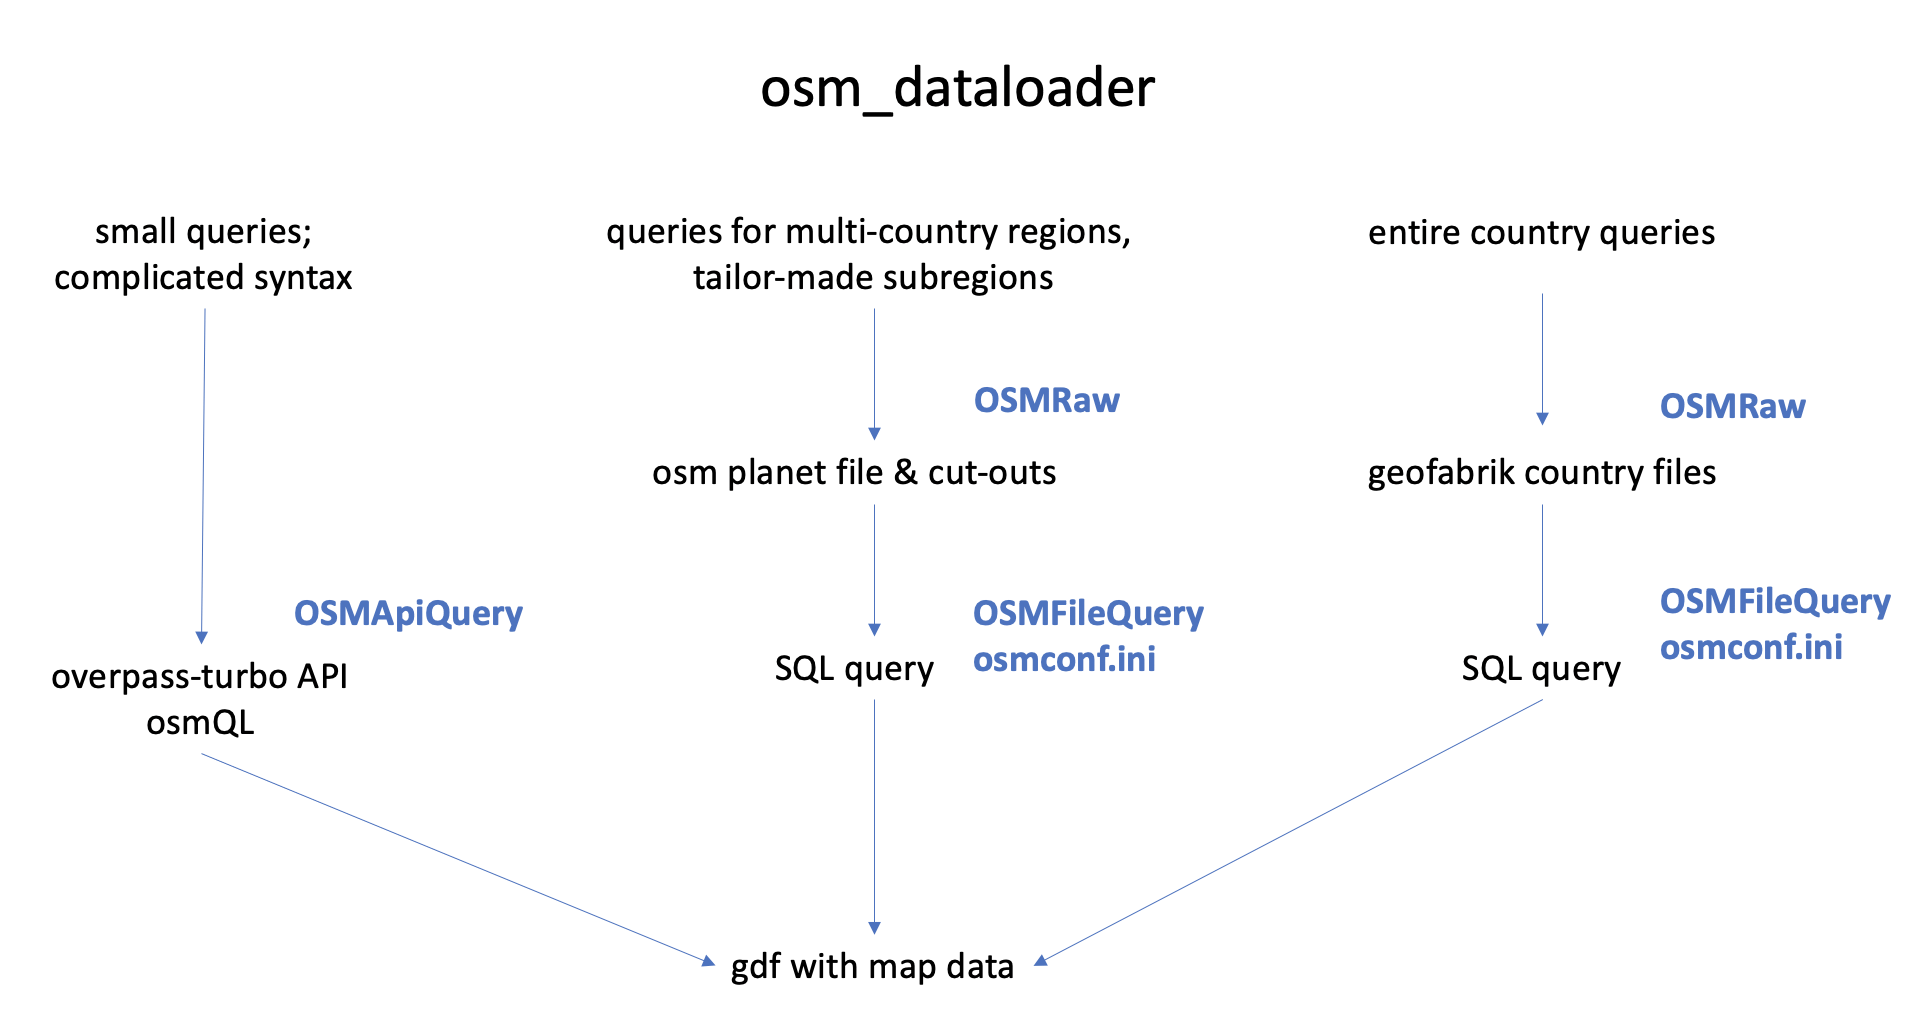

In [1]:
import matplotlib.pyplot as plt
import contextily as ctx
from climada.entity.exposures.openstreetmap.osm_dataloader import OSMRaw, OSMApiQuery, OSMFileQuery

# Example 1: Country data extracts

In [2]:
PATH_OSM_DATA = '/Users/evelynm/Documents/WCR/3_PhD/1_coding_stuff/x_data/osm_countries'
OSMRaw().get_data_geofabrik('HND', file_format='pbf', save_path=PATH_OSM_DATA)

2021-07-14 13:45:34,024 - climada.entity.exposures.openstreetmap.osm_dataloader - INFO - file already exists as /Users/evelynm/Documents/WCR/3_PhD/1_coding_stuff/x_data/osm_countries/honduras-latest.osm.pbf


In [3]:
path_osm_hnd = '/Users/evelynm/Documents/WCR/3_PhD/1_coding_stuff/x_data/osm_countries/honduras-latest.osm.pbf'
HNDFileQuery = OSMFileQuery(path_osm_hnd)

### 1.1 Pre-written Critical Infrastructure Wrappers

In [4]:
gdf_roads = HNDFileQuery.retrieve_cis('road')

2021-07-14 13:46:33,260 - climada.entity.exposures.openstreetmap.osm_dataloader - INFO - query is finished, lets start the loop


extract points: 0it [00:00, ?it/s]

2021-07-14 13:46:34,968 - climada.entity.exposures.openstreetmap.osm_dataloader - INFO - query is finished, lets start the loop



extract multipolygons: 100%|██████████| 2/2 [00:20<00:00, 10.27s/it]

2021-07-14 13:47:16,605 - climada.entity.exposures.openstreetmap.osm_dataloader - INFO - query is finished, lets start the loop



extract lines: 100%|██████████| 5591/5591 [00:04<00:00, 1249.33it/s]


In [ ]:
ax = gdf_roads.set_crs(epsg=4326).to_crs(epsg=3857).plot(figsize=(15, 15), alpha=1, markersize=5, color='blue', 
                    edgecolor='blue', label='roads HND')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, loc='upper left')
ax.set_title('Roads Honduras', fontsize=25)
ctx.add_basemap(ax)
plt.show()

### 1.2 Self-written query constraints

In [ ]:
constraint_dict = {'osm_keys' : ['landuse'],
                   'osm_query' : """landuse='forest'"""}
gdf_forest = HNDFileQuery.retrieve('multipolygons', constraint_dict)

In [ ]:
ax = gdf_forest.set_crs(epsg=4326).to_crs(epsg=3857).plot(figsize=(15, 15), alpha=1, markersize=5, color='blue', 
                    edgecolor='blue', label='forests HND')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, loc='upper left')
ax.set_title('Forests Honduras', fontsize=25)
ctx.add_basemap(ax)
plt.show()

# Example 2: Custom-shape region extracts

1. Shape file of your desired region --> convert to .poly file.     
    
        How? See e.g. https://github.com/ElcoK/osm_clipper for admin3 to admin1 level shape conversions.
        Also, some command line tools, like osm_convert
   Bounding box --> just pass the list [xmin, ymin, xmax, ymax]


2. osm planet file --> cut out the desired region (via command line tool osmosis under the hood). Yields a new osm.pbf file


3. rest is the same as the example before, using the newly created file.

In [ ]:
planet_file_path = '/Users/evelynm/Documents/WCR/3_PhD/1_coding_stuff/x_data/osm_countries'
poly_file_path = '/Users/evelynm/Documents/WCR/3_PhD/1_coding_stuff/x_data/osm_countries/country_poly_files/ABW.poly'
bbox_customreg = []

OSMraw().get_data_planetextract(shape= poly_file_path,
                                path_planet=planet_file_path, 
                                path_extract=planet_file_path)

OSMraw().get_data_planetextract(shape= bbox_customreg,
                                path_planet=planet_file_path, 
                                path_extract=planet_file_path)

In [ ]:
path_customreg = '/Users/evelynm/Documents/WCR/3_PhD/1_coding_stuff/x_data/osm_countries/customreg.osm.pbf'
CustomRegFileQuery = OSMFileQuery(path_customreg)

# Example 3: Local data API extracts

### 3.1 Foreword: OSM overpass-turbo, Overpass QL & OSM data structures (nodes, ways, relations)

Check out https://taginfo.openstreetmap.org/ for finding the key-value pairs ("tags") you're looking for.

Check out https://overpass-turbo.eu/ for a fast visual overview on results that your query will yield.

The osm api has constraints on how much can be downloaded at once (reached quite fast, especially around mid-day / early afternoon..). Wait-times implemented in the querying, but re-consider your strategy if you run into a time-out error.

Overpass Query language can be a bit cryptic. The majority of what you will need is handled in the OSMApiQuery automatically.
For more, check out the detailed read-the-docs: https://wiki.openstreetmap.org/wiki/Overpass_API/Overpass_QL 

From https://wiki.openstreetmap.org/wiki/Elements : 

Elements are the basic components of OpenStreetMap's conceptual data model of the physical world. Elements are of three types:

* nodes (defining points in space),
* ways (defining linear features and area boundaries), and
* relations (which are sometimes used to explain how other elements work together).

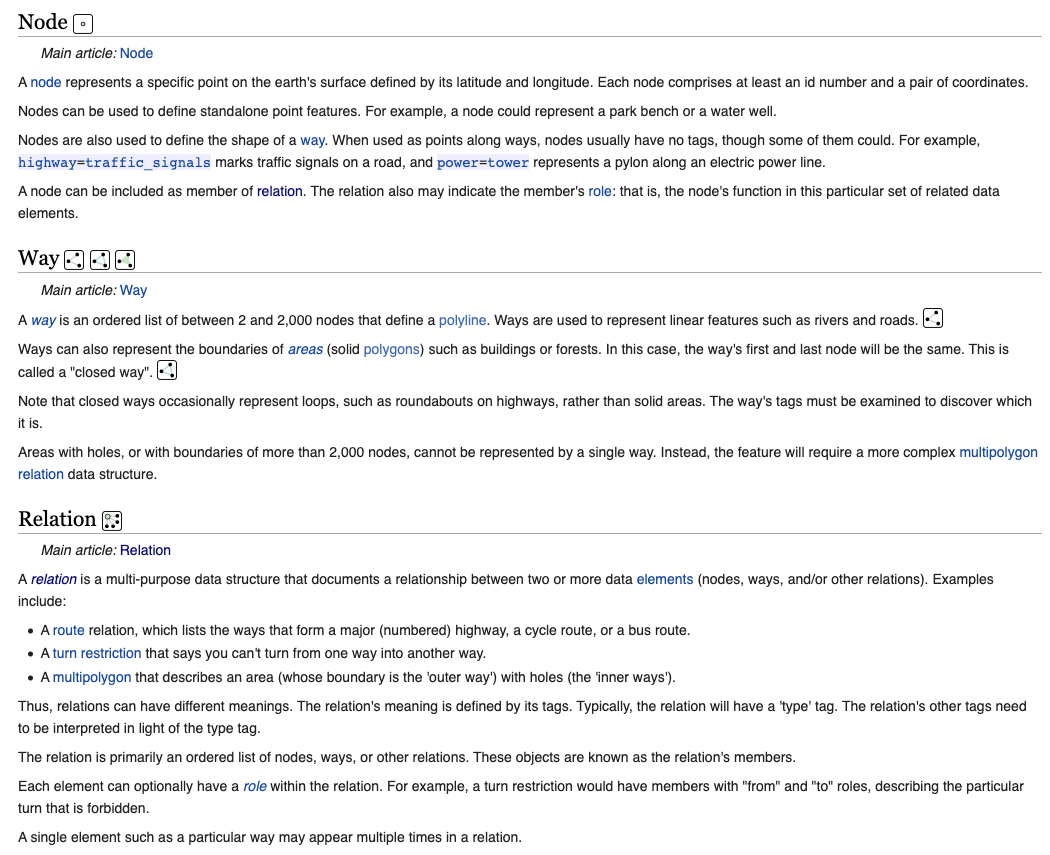

### 3.2 Example: Churches in the city of Zurich

In [ ]:
area = (47.368260,8.5327506,47.376877,8.5486078)
condition = '["amenity"="place_of_worship"]'
zrh_churchquery = OSMApiQuery(area, condition)

In [ ]:
gdf_zrh_churches = zrh_churchquery.get_data_overpass()

In [ ]:
gdf_zrh_churches

In [ ]:
gdf_zrh_churches.plot()

# Outlook

* API Query: More flexible area entries (bbox, polygons, location names)
* API Query: Error / exception handling in geometry construction
* API Query: allow specification of query levels (nodes / ways / relations)?

* File Query: desired polygons to .poly format for cutting: remains outsourced (?)


* exposuremaker: another discussion on useful functionalities to keep / throw away